This notebook is part of my [Python data science curriculum](http://www.terran.us/articles/python_curriculum.html)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import statsmodels.graphics.regressionplots as smrp # This name is not standard

import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
import seaborn as sns
tips=sns.load_dataset('tips')

from plotnine.data import diamonds
diamonds_small=diamonds.sample(1000,random_state=0)
diamonds_small.to_csv('/tmp/diamonds_small.csv')

# Linear Regression

There are two interfaces to statsmodels, the statsmodels.api interface, which takes vectors and matrices, and the statsmodels.formula interface, which uses R-style formulas from the Patsy library.

http://www.statsmodels.org/stable/example_formulas.html  
https://patsy.readthedocs.io/en/latest/formulas.html

Here's a port of the ISLR ch 3 labs to Python, using a mix of sklearn and statsmodels:

http://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%203.ipynb

## Single Feature

In [3]:
m=smf.ols('I(tip/total_bill) ~ total_bill', tips).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     I(tip / total_bill)   R-squared:                       0.115
Model:                             OLS   Adj. R-squared:                  0.111
Method:                  Least Squares   F-statistic:                     31.34
Date:                 Wed, 12 Dec 2018   Prob (F-statistic):           5.85e-08
Time:                         14:53:02   Log-Likelihood:                 351.29
No. Observations:                  244   AIC:                            -698.6
Df Residuals:                      242   BIC:                            -691.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2068      0.009     22.975      0.000       0.189       0.224
total_bill    -0.0023      0.000     -5.599      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      224.802   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7863.442
Skew:                           3.420   Prob(JB):                         0.00
Kurtosis:                      29.957   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It appears that the "warning" about how standard errors assume the errors are correctly specified is _always_ printed, as a general reminder, and does not result from any actual observation that your data violates the assumptions.

---

One thing we often want to look at is a scatter plot of actual vs predicted values:

In [4]:
p = pd.DataFrame({'actual':tips.tip/tips.total_bill, 'predicted':m.predict()})

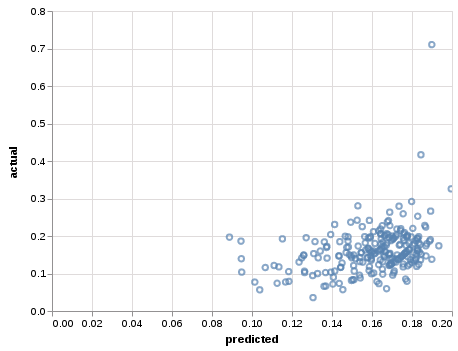

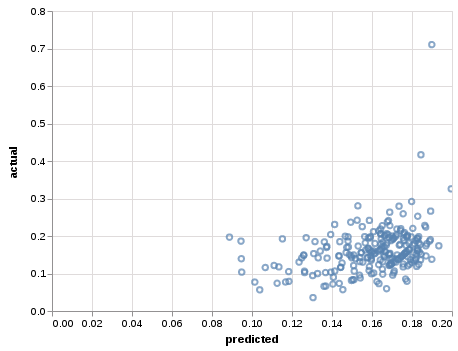

In [5]:
alt.Chart(p.reset_index()).mark_point().encode(
    x='predicted',y='actual',tooltip='index'
).interactive()

With a single feature, we can also look at the predicted values against the actual values as a function of the feature:

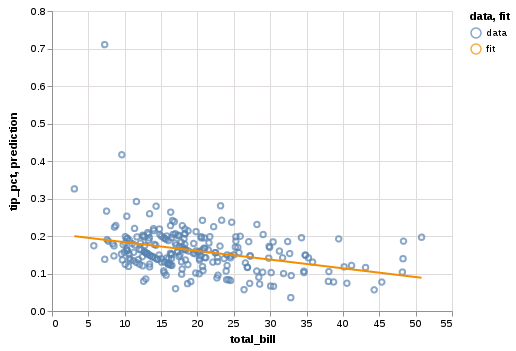

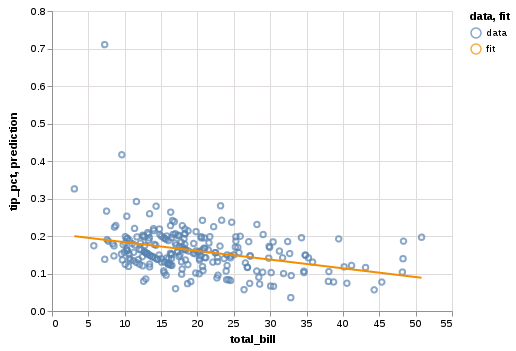

In [6]:
tips2 = tips.assign(prediction=m.predict(tips))
c=alt.Chart(tips2.reset_index().assign(data='data').assign(fit='fit'))
c.mark_point().encode(
    x='total_bill',y='tip_pct:Q',color='data',tooltip='index'
).transform_calculate(tip_pct='datum.tip/datum.total_bill') + \
c.mark_line().encode(
    x='total_bill',y='prediction',color='fit'
)

## Aside: Data Description

In [7]:
# Correlation:
tips2.corr()

,total_bill,tip,size,prediction
total_bill,1.000000,0.675734,0.598315,-1.000000
tip,0.675734,1.000000,0.489299,-0.675734
size,0.598315,0.489299,1.000000,-0.598315
prediction,-1.000000,-0.675734,-0.598315,1.000000


In [8]:
# Descriptive Summary Statistics
tips2.describe()

,total_bill,tip,size,prediction
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.020681
min,3.070000,1.000000,1.000000,0.088733
25%,13.347500,2.000000,2.000000,0.150717
50%,17.795000,2.900000,2.000000,0.165428
75%,24.127500,3.562500,3.000000,0.175759
max,50.810000,10.000000,6.000000,0.199634


## Multiple Features

The tips data is not very satisfactory because there are *no* other features which have predictive
value, so let's cut over to the diamonds data instead.

In [9]:
dm = smf.ols('price ~ carat', data=diamonds_small).fit()
dm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     5375.
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:53:02   Log-Likelihood:                -8720.1
No. Observations:                1000   AIC:                         1.744e+04
Df Residuals:                     998   BIC:                         1.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2124.5882     92.866    -22.878      0.000   -2306.824   -1942.353
carat       7464.6148    101.817     73.314      0.000    7264.815    7664.415
==============================================================================
Omnibus:                      358.621   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2712.771
Skew:                           1.439   Prob(JB):                         0.00
Kurtosis:                      10.538   Cond. No.                         3.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
dm2 = smf.ols('price ~ carat + cut + color + clarity', diamonds_small).fit()
dm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     560.2
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:53:02   Log-Likelihood:                -8435.7
No. Observations:                1000   AIC:                         1.691e+04
Df Residuals:                     981   BIC:                         1.700e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6765.6024    380.700    -17.771      0.000   -7512.683   -6018.522
cut[T.Good]        825.7178    227.020      3.637      0.000     380.218    1271.218
cut[T.Very Good]   956.2631    212.038      4.510      0.000     540.164    1372.363
cut[T.Premium]    1085.9238    206.155      5.268      0.000     681.368    1490.479
cut[T.Ideal]      1111.1437    205.528      5.406      0.000     707.819    1514.468
color[T.E]        -121.9358    134.102     -0.909      0.363    -385.096     141.224
color[T.F]        -247.0903    139.053     -1.777      0.076    -519.965      25.784
color[T.G]        -587.7450    129.794     -4.528      0.000    -842.451    -333.039
color[T.H]        -977.0982    140.347     -6.962      0.000   -1252.512    -701.684
color[T.I]       -1498.8588    154.683     -9.690      0.000   -1802.406   -1195.311
color[T.J]       -2039.7143    186.973    -10.909      0.000   -2406.628   -1672.801
clarity[T.SI2]    2096.7244    341.299      6.143      0.000    1426.965    2766.484
clarity[T.SI1]    3067.2989    340.235      9.015      0.000    2399.627    3734.970
clarity[T.VS2]    3595.6822    341.526     10.528      0.000    2925.477    4265.888
clarity[T.VS1]    3976.8995    344.848     11.532      0.000    3300.175    4653.624
clarity[T.VVS2]   4389.8382    358.084     12.259      0.000    3687.138    5092.538
clarity[T.VVS1]   4665.2201    372.184     12.535      0.000    3934.851    5395.589
clarity[T.IF]     4985.8844    393.864     12.659      0.000    4212.972    5758.797
carat             8563.0631     89.174     96.026      0.000    8388.068    8738.058
==============================================================================
Omnibus:                      348.005   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2068.181
Skew:                           1.470   Prob(JB):                         0.00
Kurtosis:                       9.403   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

You can do a type-2 anova to look at the partial impact of each feature:

In [11]:
sm.stats.anova_lm(dm2,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
cut,4.0,2.943537e+08,7.358842e+07,58.053442,5.242987e-44
color,6.0,5.631738e+08,9.386230e+07,74.047375,3.157111e-76
clarity,7.0,2.354703e+08,3.363861e+07,26.537285,1.925481e-33
carat,1.0,1.168850e+10,1.168850e+10,9220.985392,0.000000e+00
Residual,981.0,1.243514e+09,1.267598e+06,NaN,NaN


You can also compare one model to another model:

In [12]:
# This will produce some warnings, which I think are noise but I'm not certain
# see https://groups.google.com/forum/#!topic/pystatsmodels/-flY0cNnb3k

sm.stats.anova_lm(dm,dm2)

/home/terran/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/terran/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/terran/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,998.0,2.196307e+09,0.0,NaN,NaN,NaN
1,981.0,1.243514e+09,17.0,9.527935e+08,44.21487,1.495583e-108


## Standard Plots

In [13]:
import statsmodels.graphics.regressionplots as smrp

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)

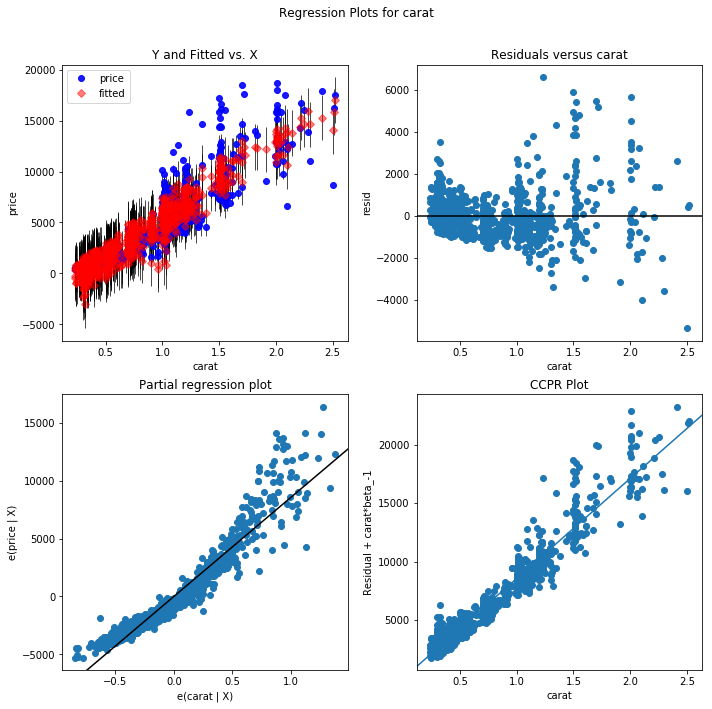

In [14]:
smrp.plot_regress_exog(dm2,-1);

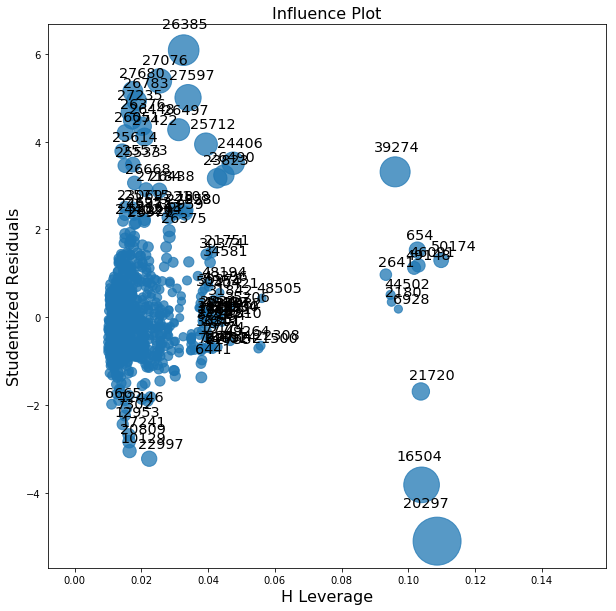

In [15]:
smrp.influence_plot(dm2);

In [16]:
diamonds_small.loc[[26385,39274,16504,20297],]

,carat,cut,color,clarity,depth,table,price,x,y,z
26385,1.23,Very Good,E,VVS1,61.2,59.0,15878,6.90,6.98,4.25
39274,0.32,Ideal,E,I1,60.7,57.0,490,4.45,4.41,2.69
16504,2.10,Fair,G,I1,67.4,59.0,6597,7.82,7.76,5.24
20297,2.50,Fair,G,I1,65.1,59.0,8711,8.55,8.39,5.53


Seaborn also has a standard pairs plot which isn't bad, although note that it skips the categorical variables:

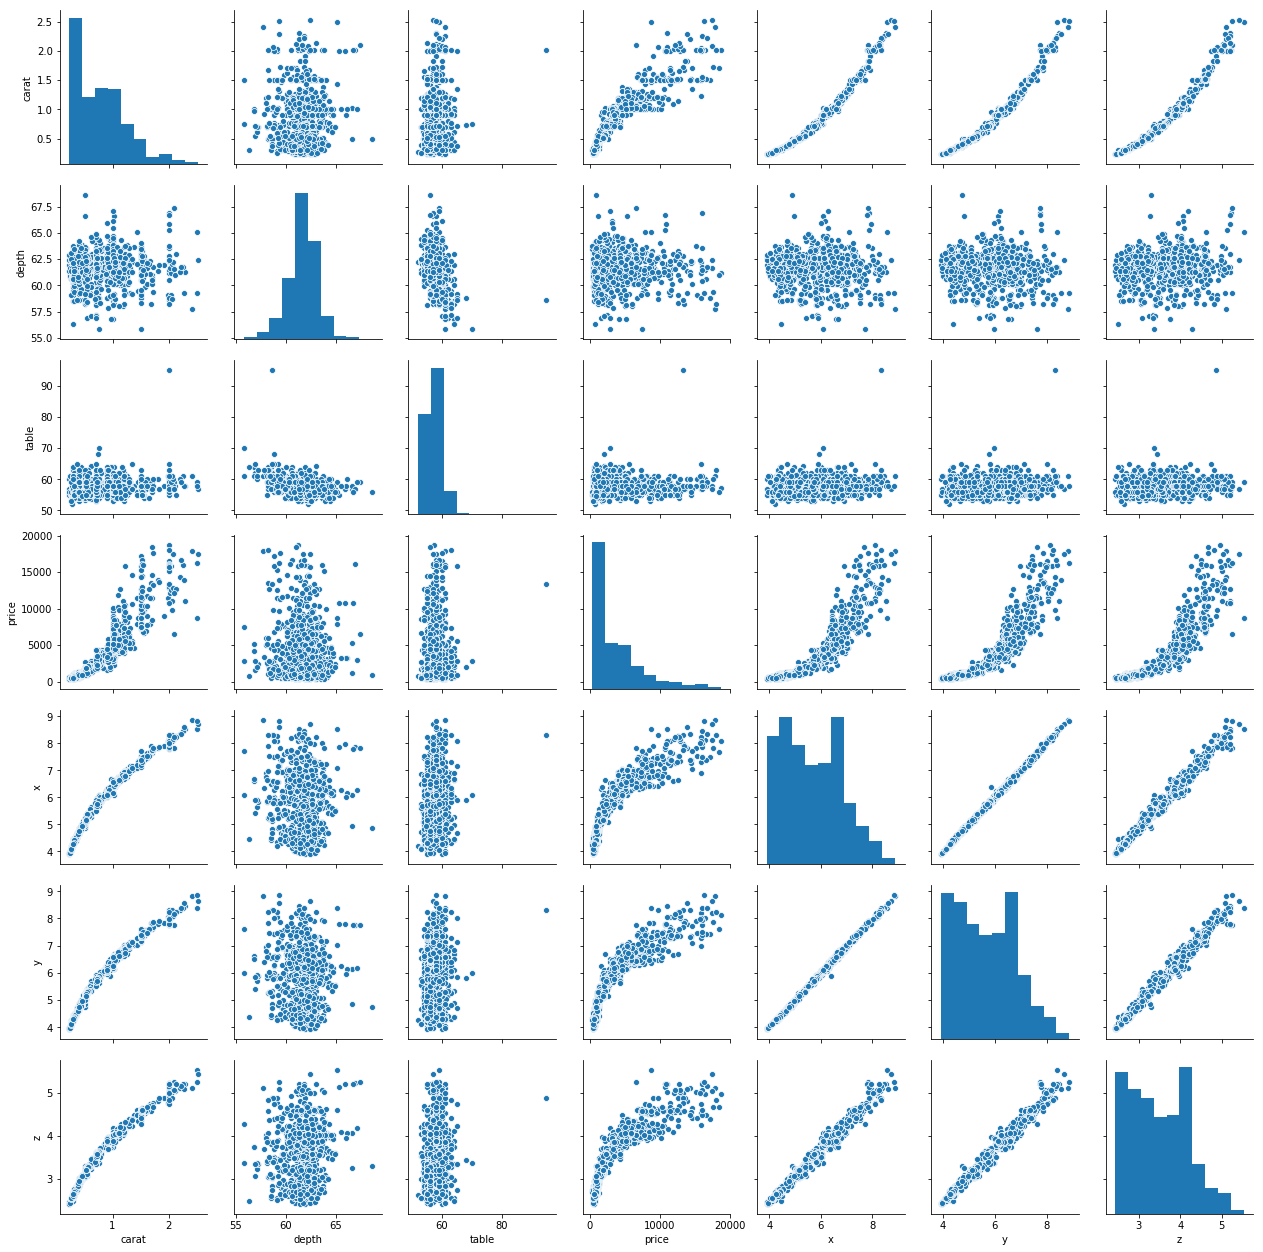

In [17]:
sns.pairplot(diamonds_small)

# Logistic Regression

http://www.statsmodels.org/stable/glm.htm  
http://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%204.ipynb#4.3-Logistic-Regression

In [18]:
from plotnine.data import mpg
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Logistic regression is available in either the `logit` or `glm` methods.  The lowercase version uses the formula interface, and the uppercase version expects vectors and matrices.

In [19]:
glm = smf.glm('year==2008 ~ displ + hwy', mpg, family=sm.families.Binomial()).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Generalized Linear Model Regression Results                               
=========================================================================================================
Dep. Variable:     ['year == 2008[False]', 'year == 2008[True]']   No. Observations:                  234
Model:                                                       GLM   Df Residuals:                      231
Model Family:                                           Binomial   Df Model:                            2
Link Function:                                             logit   Scale:                          1.0000
Method:                                                     IRLS   Log-Likelihood:                -155.56
Date:                                           Wed, 12 Dec 2018   Deviance:                       311.12
Time:                                                   14:53:14   Pearson chi2:                     235.
No. Iterations:                                                4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5709      1.444      3.166      0.002       1.741       7.401
displ         -0.6170      0.180     -3.422      0.001      -0.971      -0.264
hwy           -0.1041      0.038     -2.729      0.006      -0.179      -0.029
==============================================================================
"""

A boolean cannot be used as the result with `logit`; it must be a 0/1 integer.  see https://stackoverflow.com/questions/30314188/statsmodels-broadcast-shapes-different

In [20]:
mpg['y8']=(mpg.year==2008).astype('int8')
lm = smf.logit('y8 ~ displ + hwy', mpg).fit()
lm.summary()

Optimization terminated successfully.
         Current function value: 0.664776
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     y8   No. Observations:                  234
Model:                          Logit   Df Residuals:                      231
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Dec 2018   Pseudo R-squ.:                 0.04093
Time:                        14:53:14   Log-Likelihood:                -155.56
converged:                       True   LL-Null:                       -162.20
                                        LLR p-value:                  0.001309
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5709      1.444     -3.166      0.002      -7.401      -1.741
displ          0.6170      0.180      3.422      0.001       0.264       0.971
hwy            0.1041      0.038      2.729      0.006       0.029       0.179
==============================================================================
"""

Of the two, I think I prefer the logit() summary output.  The glm() summary is missing the null value for deviance or likelihood, which is quite annoying.

## ROC curves

In [21]:
# Apparently statsmodels has no ROC curve; use sklearn
from sklearn.metrics import roc_curve

In [22]:
(fpr,tpr,thresh)=roc_curve(mpg.y8,lm.predict())
roc=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresh':thresh})

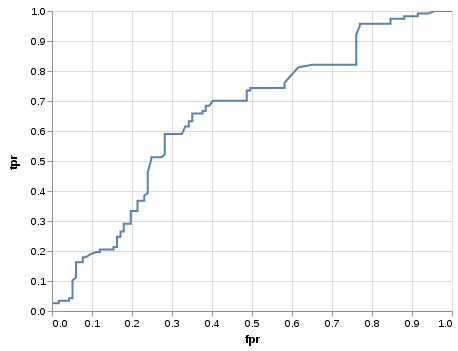

In [23]:
alt.Chart(roc).mark_line().encode(
    x='fpr',y='tpr',order='thresh').interactive()

# Scratch - Ignore

In [24]:
from plotnine.data import diamonds
try:
    smf.ols('price ~ poly(carat,4) + cut + color + clarity', diamonds).fit().summary()
except Exception as ex:
    print(repr(ex))

PatsyError("Error evaluating factor: NameError: name 'poly' is not defined",)
